In [1]:
%load_ext autoreload
%autoreload 2

from src.multiagent_mpc import MultiMPC 
from rl.rl_auxilliary import SVODatasetFromLog
import numpy as np
import glob, json, pickle, os, shutil
import torch
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter


In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [3]:
dataset = torch.load("/home/nbuckman/mpc_results/rl_txt_0504/rl_svo_dataset_0504_2359")

In [4]:
svos = np.array([dataset[j]['svos'] for j in range(len(dataset))])

In [5]:
print("Length of Dataset: %d"%len(dataset))

Length of Dataset: 239


Text(0, 0.5, 'Count')

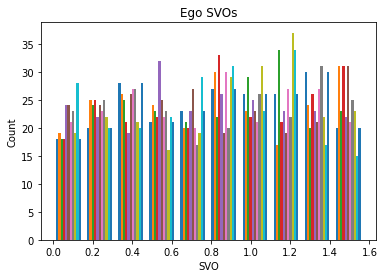

In [6]:
plt.hist(svos)
plt.title("Ego SVOs")
plt.xlabel("SVO")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

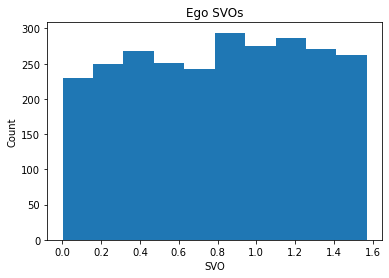

In [7]:
plt.hist(svos.reshape(svos.shape[0]*svos.shape[1], 1))
plt.title("Ego SVOs")
plt.xlabel("SVO")
plt.ylabel("Count")

## Train an value function of just ambulance

In [8]:
sm = SummaryWriter()

In [9]:
sm.log_dir

'runs/May05_11-32-27_nbuckman-desktop'